<a href="https://colab.research.google.com/github/merniesgugh/Coderhouse_DS_2/blob/main/Primera_Entrega_Proyecto_DS_2_Gustavo_Mernies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

**Abstracto con Motivación y Audiencia**

# Abstracto: Análisis de Datos de Jugadores de FIFA 22

## Motivación
El análisis de datos deportivos ha revolucionado la manera en que los equipos y jugadores profesionales son evaluados. Este dataset ofrece una oportunidad única para explorar cómo las características individuales de los jugadores influyen en su valoración económica y rendimiento percibido. Los insights obtenidos pueden ser útiles tanto para clubes de fútbol como para desarrolladores de videojuegos interesados en simulaciones realistas.

## Audiencia
- **Equipos de análisis deportivo**: Para comprender mejor las dinámicas de valoración de jugadores.
- **Desarrolladores de videojuegos**: Para refinar mecánicas de simulación.
- **Científicos de datos y estudiantes**: Como caso de estudio en predicción y análisis multivariable.

**Contexto Comercial y Analítico**

# Contexto Comercial y Analítico

## Contexto Comercial

### 1. Industria del Deporte
- **Contratación de Jugadores:**  
  Los clubes de fútbol necesitan optimizar la asignación de recursos para fichajes. Un modelo de Machine Learning basado en este dataset puede ayudar a predecir el rendimiento potencial de los jugadores, mejorando la eficiencia en la toma de decisiones financieras.
- **Scouting y Evaluación:**  
  Identificar talentos jóvenes con alto potencial, comparándolos con jugadores establecidos para estrategias de desarrollo a largo plazo.

### 2. Videojuegos y Simulaciones
- **Fidelidad Realista:**  
  Los desarrolladores de videojuegos (como EA Sports) pueden ajustar sus simulaciones de acuerdo con las predicciones basadas en atributos reales, mejorando la inmersión de los jugadores al reflejar valoraciones de mercado más precisas.
- **Ajuste de Mecánicas:**  
  Balancear la jugabilidad mediante la predicción de habilidades y costos para evitar distorsiones en las dinámicas de juego.

### 3. Marketing Deportivo
- **Estrategias de Marca:**  
  Comprender qué atributos de los jugadores aumentan su popularidad y desempeño puede orientar campañas publicitarias y asociaciones estratégicas.
- **Merchandising:**  
  Predecir qué jugadores tienen mayor potencial para generar ingresos adicionales, como ventas de camisetas y otros artículos.

---

## Contexto Analítico

### 1. Predicción de Valores Clave
- **Valor de Mercado:**  
  Determinar los factores que contribuyen al rendimiento general (overall) de un jugador.
- **Potencial Máximo:**  
  Analizar cómo las características iniciales predicen la proyección futura de un jugador.

### 2. Reducción de Complejidad
- **Identificación de Patrones:**  
  Encontrar relaciones clave entre atributos como posiciones, estadísticas específicas y su desempeño general.
- **Segmentación:**  
  Agrupar jugadores en clústeres basados en habilidades, valor y potencial, útil para estrategias específicas.

### 3. Toma de Decisiones Basada en Datos
- **Priorización de Fichajes:**  
  Facilitar la priorización de fichajes o inversiones basadas en predicciones cuantitativas.
- **Optimización Económica:**  
  Apoyar estrategias de optimización económica en videojuegos y simulaciones deportivas.

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

# Preguntas e Hipótesis a Resolver

## Estas Podrían ser Algunas Preguntas a Resolver
   
1. **¿Qué características predicen mejor el potencial máximo de un jugador?**  
   - ¿Se puede identificar el futuro rendimiento de un jugador basándose en sus atributos actuales?

2. **¿Cómo varían las valoraciones de los jugadores según su posición?**  
   - ¿Los porteros tienen patrones diferentes de valoración en comparación con delanteros o mediocampistas?

---

## Hipótesis a Evaluar
**"¿El valor de mercado de un jugador está correlacionado con su calificación general ('overall') y su potencial máximo o existen otros factores mas determinantes?."**  
   
  

# Objetivo del Proyecto

El objetivo principal de este proyecto es analizar y modelar los factores que influyen en el potencial de los jugadores en FIFA 22, utilizando técnicas de Machine Learning (en este caso **regresión**). Esto incluye:

1. **Predecir el potencial máximo de un jugador** a partir de sus características actuales.  
2. **Identificar patrones clave en los atributos de los jugadores** para optimizar estrategias de fichajes y scouting en el ámbito deportivo.  

Este enfoque combina análisis descriptivo y predictivo, con el propósito de generar soluciones basadas en datos para la toma de decisiones en el deporte y la tecnología.

#**Presentación ejecutiva**

En la entrega final se incluirá un link a la presentación ejecutava o documentación (Storytelling)

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [1]:

# **Instalación de bibliotecas necesarias**
!pip install geopandas matplotlib requests
!pip install geodatasets


# **Bibliotecas para manejo de datos y operaciones matemáticas**
import pandas as pd
import numpy as np
import math

# **Bibliotecas para visualización de datos**
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.express as px

# **Bibliotecas para análisis estadístico**
from scipy.stats import pearsonr

# **Bibliotecas para manejo de datos geoespaciales**
import geopandas as gpd
from geodatasets import get_path
import requests
import io


**Configuración del entorno de Python en Google Colab**

In [2]:

# Enlace directo al archivo en GitHub
url = "https://raw.githubusercontent.com/merniesgugh/Coderhouse_DS_2/main/Career%20Mode%20player%20datasets%20-%20FIFA%2015-22_.xlsx"

# Descargar el archivo Excel desde el enlace directo
# Nota: openpyxl es necesario para archivos .xlsx
df = pd.read_excel(url, engine='openpyxl')

# URL del archivo en el repositorio de Folium en GitHub
url_map = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"

# Descargar el archivo desde GitHub
response = requests.get(url_map)
response.raise_for_status()  # Verifica si hubo errores al descargar

# Leer el archivo en GeoPandas
world = gpd.read_file(io.StringIO(response.text))


**Lectura del dataset**

In [3]:
# Mostrar las primeras filas del dataset
print(df.head())

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  .

**Análisis inicial del dataset**

In [4]:
df.shape

(19239, 110)

El dataset contiene 19,239 filas y 110 columnas. Esto indica que es un conjunto de datos amplio con una gran cantidad de variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: datetime64[ns](2), float64(18), int64(44), object(46)
memory usage: 16.1+ MB


- Aquí podemos observar que el dataset incluye una mezcla de tipos de datos:
  - **2 columnas** son de tipo `datetime64[ns]`.
  - **18 columnas** contienen valores de tipo `float64`.
  - **44 columnas** contienen valores de tipo `int64`.
  - **46 columnas** contienen valores de tipo `object`.


In [6]:
print(df.isnull().sum())

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64


- Algunas columnas presentan valores nulos significativos:
  - `club_logo_url` y `club_flag_url`: **61 valores nulos cada una**.
  - `nation_logo_url`: **18,480 valores nulos**, lo que representa casi el **96% de datos ausentes** en esta columna.
- Las columnas como `sofifa_id`, `player_url`, `short_name`, `long_name`, `player_positions`, entre otras, no tienen valores nulos.

Dado que se trata de valores donde hay links a logos, banderas, etc., esto no representa un problema para nuestro anális futuro.

**Descripción de variables**

In [7]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())



Estadísticas descriptivas:
           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   

                age                            dob     height_cm  \
count  19239.000000                          19239  19239.000000   
mean      25.210822  1995-10-24 16:21:10.918446848    181.299704   
min       16.000000            1967-02

1. **Distribución de los datos**:
   - Las columnas `age`, `height_cm`, y `weight_kg` tienen medias y medianas similares, indicando distribuciones equilibradas.
   - En contraste, `wage_eur` muestra una media mucho mayor que la mediana, lo que sugiere un sesgo positivo causado por jugadores con salarios excepcionalmente altos.

2. **Rangos de los valores**:
   - Las columnas con rangos muy amplios entre valores mínimos y máximos incluyen:
     - `wage_eur`: Varía desde **0** hasta **560,000**, lo que confirma la presencia de outliers en los salarios.
     - `value_eur`: Presenta un rango amplio de **0** a **118,500,000**, indicando valores extremos en los jugadores más valiosos.

3. **Dispersión de los datos**:
   - La columna `value_eur` tiene una desviación estándar muy alta (**2,950,000**), indicando una alta variabilidad en los valores de los jugadores.
   - En contraste, columnas como `age` y `height_cm` tienen desviaciones estándar más bajas, lo que sugiere una mayor consistencia en estas variables.


# Descripción de Variables del Dataset

### Columnas (Se han omitido campos con URLs)

1. **sofifa_id (int)**: Identificador único de los jugadores en la base de datos SOFIFA.
2. **short_name (str)**: Nombre corto del jugador.
3. **long_name (str)**: Nombre completo del jugador.
4. **player_positions (str)**: Posiciones en las que el jugador puede jugar (e.g., "CM", "ST").
5. **age (int)**: Edad del jugador en el momento del registro.
6. **dob (datetime)**: Fecha de nacimiento del jugador.
7. **height_cm (int)**: Altura del jugador en centímetros.
8. **weight_kg (int)**: Peso del jugador en kilogramos.
9. **nationality (str)**: Nacionalidad del jugador.
10. **club_team_id (int)**: Identificador único del club al que pertenece el jugador.
11. **club_name (str)**: Nombre del club al que pertenece el jugador.
12. **league_name (str)**: Nombre de la liga en la que compite el club del jugador.
13. **overall (int)**: Calificación general del jugador.
14. **potential (int)**: Calificación máxima que el jugador puede alcanzar.
15. **value_eur (float)**: Valor estimado del jugador en euros.
16. **wage_eur (float)**: Salario semanal del jugador en euros.
17. **release_clause_eur (float)**: Cláusula de liberación del jugador en euros.


# Nota:
Solo se han incluido algunos campos, ya que el dataset completo tiene 110 columnas, como pudimos observar anteriormente. Se han omitido los campos con URLs ya que en este caso no tienen relevancia para nuestro análisis.

# **Data Wrangling - Limpieza y transformación de datos**

**Valores duplicados**

In [8]:
# Detectar valores duplicados
duplicados = df.duplicated()

# Verificar cuántos valores duplicados hay
print(f"Total de filas duplicadas: {duplicados.sum()}")

# Mostrar las filas duplicadas si existen
if duplicados.sum() > 0:
    print("\nFilas duplicadas:")
    print(df[duplicados])
else:
    print("\nNo se encontraron filas duplicadas.")

Total de filas duplicadas: 0

No se encontraron filas duplicadas.


**Valores nulos**

In [9]:
# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la cantidad de valores nulos en las columnas numéricas
valores_nulos = df[numerical_cols].isnull().sum()

# Filtrar solo las columnas numéricas con valores nulos
columnas_con_nulos = valores_nulos[valores_nulos > 0]

# Calcular el porcentaje de valores nulos
porcentaje_nulos = (columnas_con_nulos / len(df)) * 100

# Mostrar resultados
print("Variables numéricas con valores nulos y su porcentaje:")
for columna, cantidad in columnas_con_nulos.items():
    porcentaje = porcentaje_nulos[columna]
    print(f"{columna}: {cantidad} valores nulos ({porcentaje:.2f}%)")



Variables numéricas con valores nulos y su porcentaje:
value_eur: 74 valores nulos (0.38%)
wage_eur: 61 valores nulos (0.32%)
club_team_id: 61 valores nulos (0.32%)
league_level: 61 valores nulos (0.32%)
club_jersey_number: 61 valores nulos (0.32%)
club_contract_valid_until: 61 valores nulos (0.32%)
nation_team_id: 18480 valores nulos (96.05%)
nation_jersey_number: 18480 valores nulos (96.05%)
release_clause_eur: 1176 valores nulos (6.11%)
pace: 2132 valores nulos (11.08%)
shooting: 2132 valores nulos (11.08%)
passing: 2132 valores nulos (11.08%)
dribbling: 2132 valores nulos (11.08%)
defending: 2132 valores nulos (11.08%)
physic: 2132 valores nulos (11.08%)
goalkeeping_speed: 17107 valores nulos (88.92%)
lw: 326 valores nulos (1.69%)
rw: 326 valores nulos (1.69%)


Variables numéricas con valores nulos y su porcentaje:
value_eur: 74 valores nulos (0.38%)
wage_eur: 61 valores nulos (0.32%)
club_team_id: 61 valores nulos (0.32%)
league_level: 61 valores nulos (0.32%)
club_jersey_number: 61 valores nulos (0.32%)
club_contract_valid_until: 61 valores nulos (0.32%)
nation_team_id: 18480 valores nulos (96.05%)
nation_jersey_number: 18480 valores nulos (96.05%)
release_clause_eur: 1176 valores nulos (6.11%)
pace: 2132 valores nulos (11.08%)
shooting: 2132 valores nulos (11.08%)
passing: 2132 valores nulos (11.08%)
dribbling: 2132 valores nulos (11.08%)
defending: 2132 valores nulos (11.08%)
physic: 2132 valores nulos (11.08%)
goalkeeping_speed: 17107 valores nulos (88.92%)
lw: 326 valores nulos (1.69%)
rw: 326 valores nulos (1.69%)


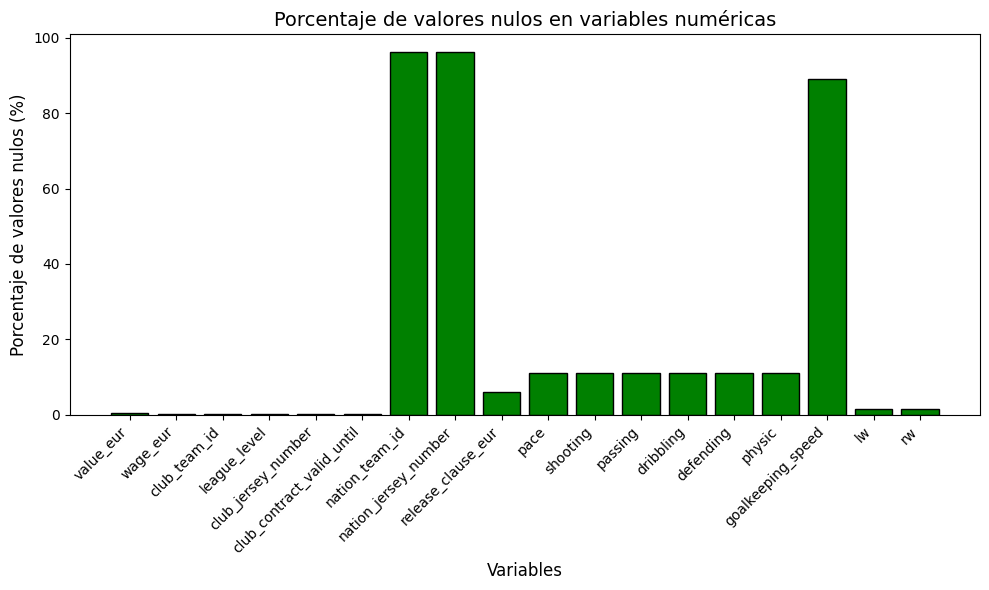

In [10]:
import matplotlib.pyplot as plt

# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la cantidad de valores nulos en las columnas numéricas
valores_nulos = df[numerical_cols].isnull().sum()

# Filtrar solo las columnas numéricas con valores nulos
columnas_con_nulos = valores_nulos[valores_nulos > 0]

# Calcular el porcentaje de valores nulos
porcentaje_nulos = (columnas_con_nulos / len(df)) * 100

# Mostrar resultados en texto
print("Variables numéricas con valores nulos y su porcentaje:")
for columna, cantidad in columnas_con_nulos.items():
    porcentaje = porcentaje_nulos[columna]
    print(f"{columna}: {cantidad} valores nulos ({porcentaje:.2f}%)")

# Visualizar gráficamente
plt.figure(figsize=(10, 6))
plt.bar(columnas_con_nulos.index, porcentaje_nulos, color='green', edgecolor='black')
plt.title("Porcentaje de valores nulos en variables numéricas", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Porcentaje de valores nulos (%)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


Vamos a efectuar este mismo análisis pero para las columnas que no tengan URLS como parte de su contenido.

In [11]:
# Filtrar columnas que no sean URLs (asumiendo que las URLs contienen 'http' o 'www')
def es_url(columna):
    return df[columna].astype(str).str.contains('http|www', na=False).any()

columnas_sin_urls = [col for col in df.columns if not es_url(col)]

# Calcular valores nulos solo en las columnas sin URLs
valores_nulos = df[columnas_sin_urls].isnull().sum()

# Filtrar columnas que tienen al menos un valor nulo
columnas_con_nulos = valores_nulos[valores_nulos > 0]

# Mostrar los nombres de las columnas con valores nulos y la cantidad de nulos en cada una
print("Columnas con valores nulos:")
for columna, cantidad in columnas_con_nulos.items():
    print(f"{columna}: {cantidad}")




Columnas con valores nulos:
value_eur: 74
wage_eur: 61
club_team_id: 61
club_name: 61
league_name: 61
league_level: 61
club_position: 61
club_jersey_number: 61
club_loaned_from: 18137
club_joined: 1163
club_contract_valid_until: 61
nation_team_id: 18480
nation_position: 18480
nation_jersey_number: 18480
release_clause_eur: 1176
player_tags: 17798
player_traits: 9841
pace: 2132
shooting: 2132
passing: 2132
dribbling: 2132
defending: 2132
physic: 2132
goalkeeping_speed: 17107
lw: 326
rw: 326


Tal como se comentó anteriormente, los valores nulos en campos como

**Columnas con valores nulos altos:** Las columnas `club_loaned_from`, `nation_team_id`, `nation_position`, `nation_jersey_number`, `player_tags`, `goalkeeping_speed` y `player_traits` muestran una cantidad considerable de valores nulos, superando los 9,000 registros. Tal vez se deban a situaciones como que no todos los jugadores están cedidos a otros clubes, por ejemplo, o no forman parte de algún equipo en este momento o directamente no tienen ciertas características registradas.

- **Otras Columnas:** Las columnas `value_eur` y `wage_eur` contienen 74 y 61 valores nulos respectivamente. Por el análisis univariado que se verá más adelante, se observa que ambas variables presentan distribuciones que no son normales, lo cual implica que los valores nulos sería mejor sustituirlos por la mediana, en lugar de la media, ya que los datos no presentan una distribución normal.

- **Atributos de rendimiento:** Columnas como `pace`, `shooting`, `passing`, `dribbling`, `defending` y `physic` tienen 2,132 valores nulos cada una, esto si podría influir en el modelo, pero tambíen es cierto que no todas las posiciones requieren tener todos estos atributos.


**Tratamiento de valores Nulos**

In [12]:
# Reemplazar valores nulos por la mediana de cada variable

df['value_eur'] = df['value_eur'].fillna(df['value_eur'].median())
df['wage_eur'] = df['wage_eur'].fillna(df['wage_eur'].median())

# Verificar que ya no haya valores nulos
print(df[['value_eur', 'wage_eur']].isnull().sum())

value_eur    0
wage_eur     0
dtype: int64


Se reemplazaron los valores nulos de `value_eur` y `wage_eur` por la mediana de cada variable. Esto nos permitirá minimizar el impacto de los outliers, que como veremos en el próximo punto, estas variables presentan.

Después de realizar este reemplazo, se verifica que ya no existan valores nulos en dichas columnas.


**Tratamiento de outliers**

Originalmente se había hecho un estudio de outliers para todas las variables numércias, luego de ver el estudio de correlación de varialbes con la variable objetivo (overall), se dedició hacer un tratamiento de outliers, **solo para las 10 variables que mas se correlacionan con la variable objetivo (Overall). Este criterio se mantendrá para los futuros pasos del análisis**

In [13]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlaciones = df_numerico.corr()

# Seleccionar las correlaciones con la variable 'overall' y ordenarlas
correlacion_overall = correlaciones['overall'].sort_values(ascending=False)

# Seleccionar las 10 variables con mayor correlación (excluyendo 'overall' misma)
top_10_correlaciones = correlacion_overall.drop('overall').head(10)

Esta sección de código pertenece al **análisis bivariado**, se usa aquí para definir **"top_10_correlaciones" que contiene a las variables con mayor coeficiente de correlación y que se usará de aquí en mas para el análisis univariaro, bivariado y multivariado, a fin de reducir la cantidad de variables a analizar.**

In [14]:
# Lista de las 10 variables más correlacionadas con 'overall'
variables_mas_correlacionadas = list(top_10_correlaciones.index)

# Función para calcular outliers usando el método IQR
def calcular_outliers(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((serie < lower_bound) | (serie > upper_bound)).sum()
    porcentaje = (outliers / len(serie)) * 100
    return outliers, porcentaje

# Calcular outliers para las variables seleccionadas
resultados_outliers = {
    "Variable": [],
    "Cantidad de Outliers": [],
    "Porcentaje de Outliers (%)": []
}

for variable in variables_mas_correlacionadas:
    outliers, porcentaje = calcular_outliers(df_numerico[variable])
    resultados_outliers["Variable"].append(variable)
    resultados_outliers["Cantidad de Outliers"].append(outliers)
    resultados_outliers["Porcentaje de Outliers (%)"].append(porcentaje)

# Convertir resultados en un DataFrame
df_outliers = pd.DataFrame(resultados_outliers)

# Mostrar los resultados
print("Análisis de Outliers para las Variables Más Correlacionadas:")
print(df_outliers)


Análisis de Outliers para las Variables Más Correlacionadas:
              Variable  Cantidad de Outliers  Porcentaje de Outliers (%)
0   movement_reactions                   359                    1.866001
1              passing                   150                    0.779666
2  mentality_composure                   250                    1.299444
3            dribbling                   328                    1.704870
4            potential                   160                    0.831644
5             wage_eur                  2395                   12.448672
6     power_shot_power                     0                    0.000000
7            value_eur                  2235                   11.617028
8   release_clause_eur                  2116                   10.998493
9               physic                   147                    0.764073


**Observaciones** Aquí se pueden notar los respectivos porcentajes de outliers para cada una de las 10 variables con mayor correlación con Overall. Por otro lado, podemos ver que en las **Conclusiones de las Gráficas de Distribución** que se ven en el análisis univariado, se indica que las varialbes económicas `wage_eur`, `value_eur`, y `release_clause_eur` muestran una fuerte asimetría positiva con colas largas, lo cual nos hace notar que no podemos reemplazar por la media (ya que es una medida muy sensible a outliers), sino que reemplazaremos los valores por la mediana. Dado que las demas variables presentan distribuciones casi normales, en esos casos el tratamiento de outliers se hará reemplazando dichos valores extremos por la media.

# **Análisis Exploratorio de datos**

**Análisis univariado**

Luego de iterar entre los análisis univariado, bivariado y multivariado, se ha vuelto a reescribir todo el código a fin de solo incluir en estos análisis las 10 variables con mayor índice de correlación con la variable objetivo 'Overall'. También se observó en estas iteraciones que las tres variables económicas: 'wage_eur', 'value_eur' y 'release_clause_eur' tienen distribuciones muy sesgadas que requieren una tranformación logarítmica para evitar un impacto negativo en el modelo. Por todo lo anterior, se ha decidido crear dos dataframes, uno llamado **df_original** que contiene las 10 variables numéricas mas correlacionadas con la variable objetivo y sin transformaciones y otro dataframe llamado **df_log_transformed** que contiene esas mismas variables con la excepción que para las 3 variables económicas, se tienen los valores transformados logarítmicamente.

A continuación se crearán dos dataframes, y se realizarán los respaldos correspondientes para asegurarnos de trabajar con los mismos dataset en el resto del proyecto y analizar los diferentes resultados en el modelo.

In [15]:
# Lista de las 10 variables más correlacionadas con 'overall'
variables_mas_correlacionadas = list(top_10_correlaciones.index)

# Variables económicas que se transformarán
economic_vars = ['wage_eur', 'value_eur', 'release_clause_eur']

# Incluir la variable 'overall' si no está ya en la lista de las más correlacionadas
if 'overall' not in variables_mas_correlacionadas:
    variables_mas_correlacionadas.append('overall')

# Filtrar solo las variables más correlacionadas (incluyendo 'overall') en el dataset original
df_original = df_numerico[variables_mas_correlacionadas].copy()

# Crear el dataset con transformaciones logarítmicas
df_log_transformed = df_original.copy()

# Aplicar la transformación logarítmica a las variables económicas
for var in economic_vars:
    if var in df_log_transformed.columns:
        df_log_transformed[var] = np.log1p(df_log_transformed[var])  # log(1 + x) para evitar log(0)

# Crear copias de respaldo
df_original_backup = df_original.copy()
df_log_transformed_backup = df_log_transformed.copy()



### Gráficas de Distribución de las 10 variables mas correlacionadas con 'Overall'

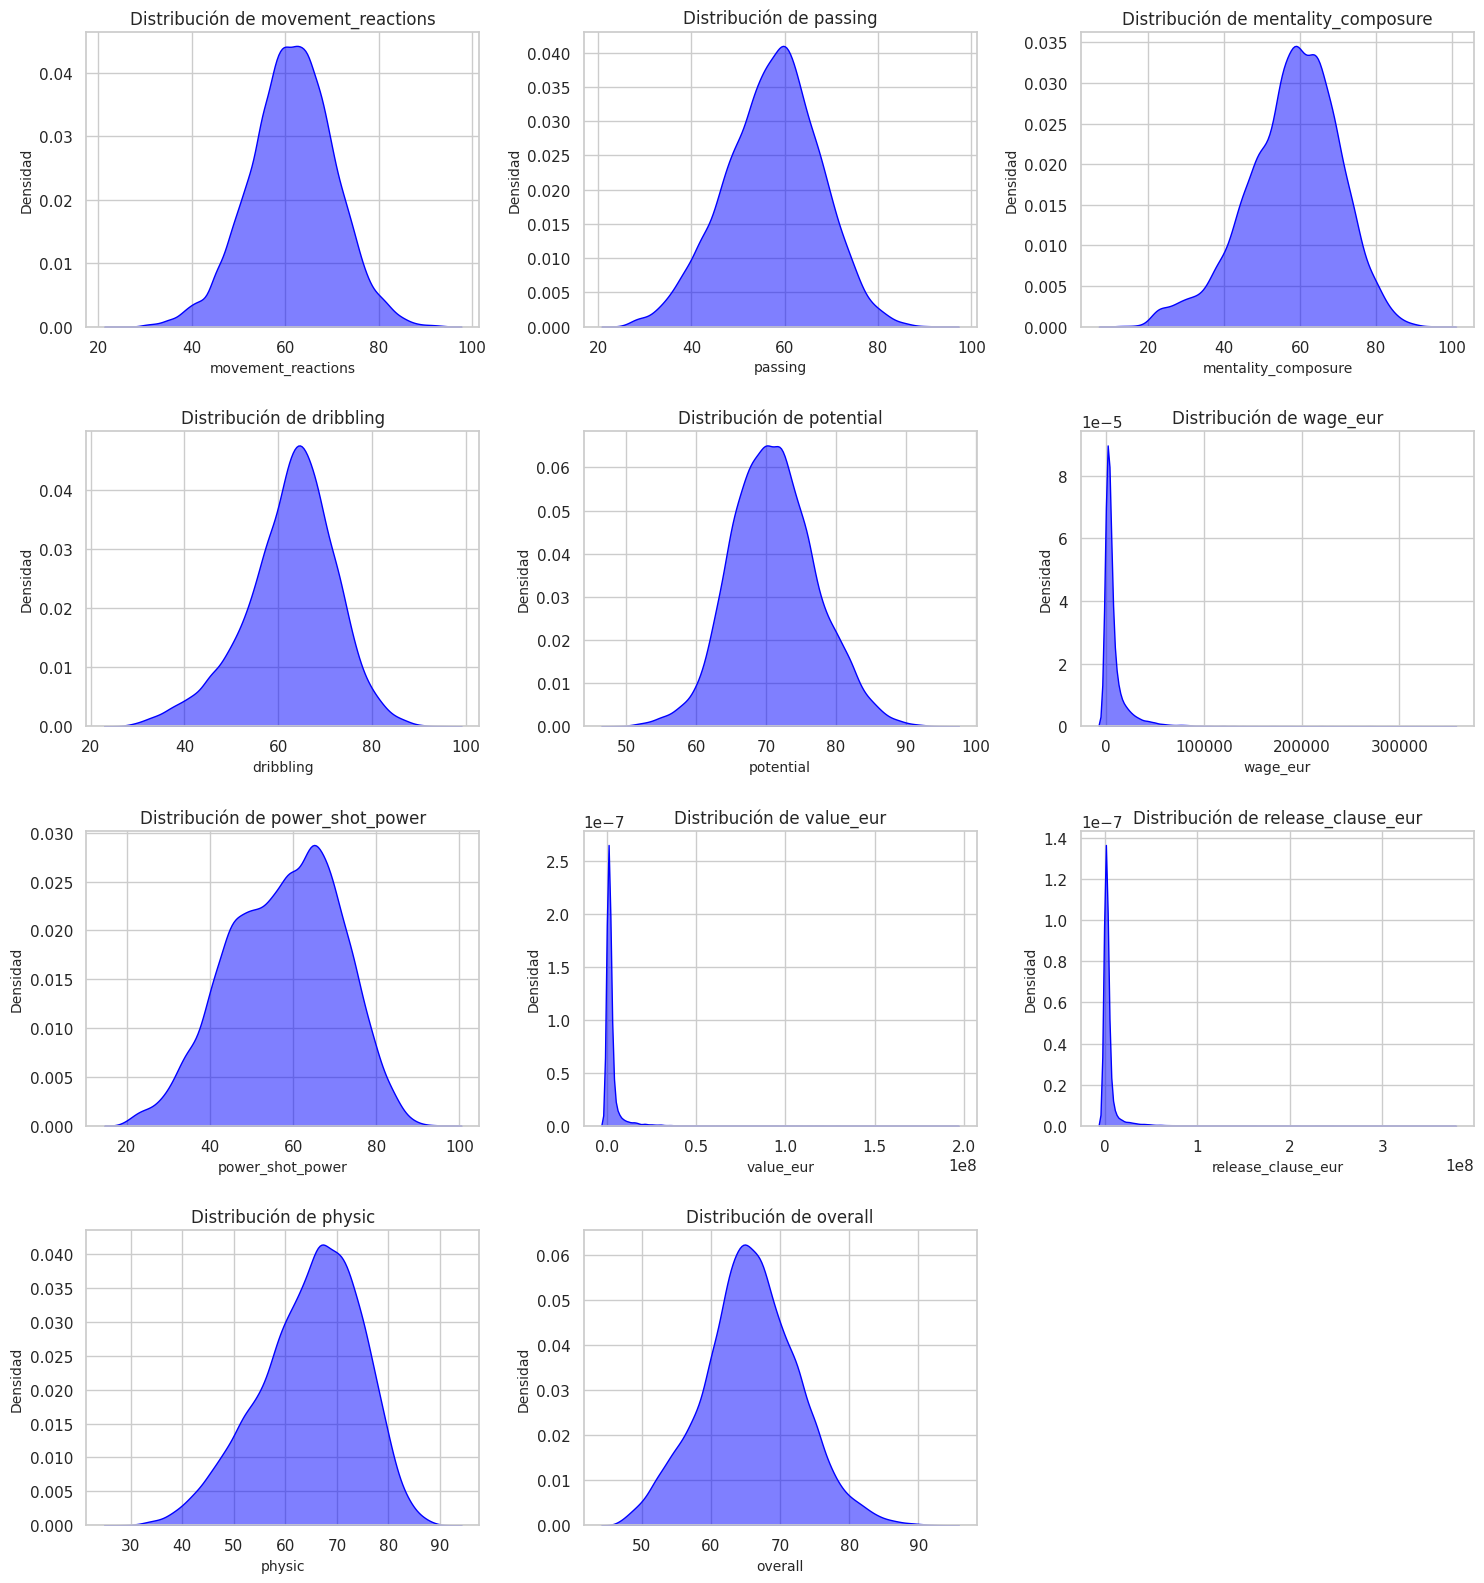

In [16]:
# Configuración de estilo para los gráficos
sns.set(style="whitegrid")


# Recuperar desde los respaldos si es necesario
df_original = df_original_backup.copy()


# Función para graficar densidad en formato de cuadrícula
def graficar_densidad_cuadricula(df, variables, columnas=3):
    filas = math.ceil(len(variables) / columnas)  # Calcular el número de filas
    plt.figure(figsize=(columnas * 5, filas * 4))  # Ajustar tamaño del grid

    for i, var in enumerate(variables, 1):
        if var in df.columns:
            plt.subplot(filas, columnas, i)  # Crear subgráfica
            sns.kdeplot(df[var], fill=True, alpha=0.5, color="blue")
            plt.title(f"Distribución de {var}", fontsize=12)
            plt.xlabel(var, fontsize=10)
            plt.ylabel("Densidad", fontsize=10)
            plt.grid(True)

    plt.tight_layout()  # Ajustar espacio entre gráficos
    plt.show()

# Lista de variables del DataFrame original para graficar
variables_para_graficar = variables_mas_correlacionadas  # Usar las variables más correlacionadas

# Generar gráficos de densidad en formato de cuadrícula
graficar_densidad_cuadricula(df_original, variables_para_graficar, columnas=3)





Estos son los **resultados en el dataframe original**, es decir sin transofrmar los valores de las tres variables económicas 'wage_eur', 'value_eur'y 'release_clause_eur'.

### Conclusiones de las Gráficas de Distribución

1. **Distribuciones normales:** Variables como `movement_reactions`, `passing`, `mentality_composure`, `dribbling`, `potential`, `power_shot_power`, y `physic` presentan distribuciones cercanas a la normal, siendo buenos predictores de `overall`.

2. **Asimetría en variables económicas:** `wage_eur`, `value_eur`, y `release_clause_eur` muestran una fuerte asimetría positiva con colas largas, indicando la presencia de outliers. Esto seguramente requerirá aplicar algún tipo de tranformación para normalizar su distribución a fin de miinimizar el impacto negativo en el modelo predictivo.

3. **Estabilidad en variables técnicas:** Las variables técnicas tienen distribuciones estables y son menos afectadas por outliers, lo que las hace muy buenas para el modelo.


A continuación se verán los resultados para el dataframe con las **tres variables económicas transformadas:**

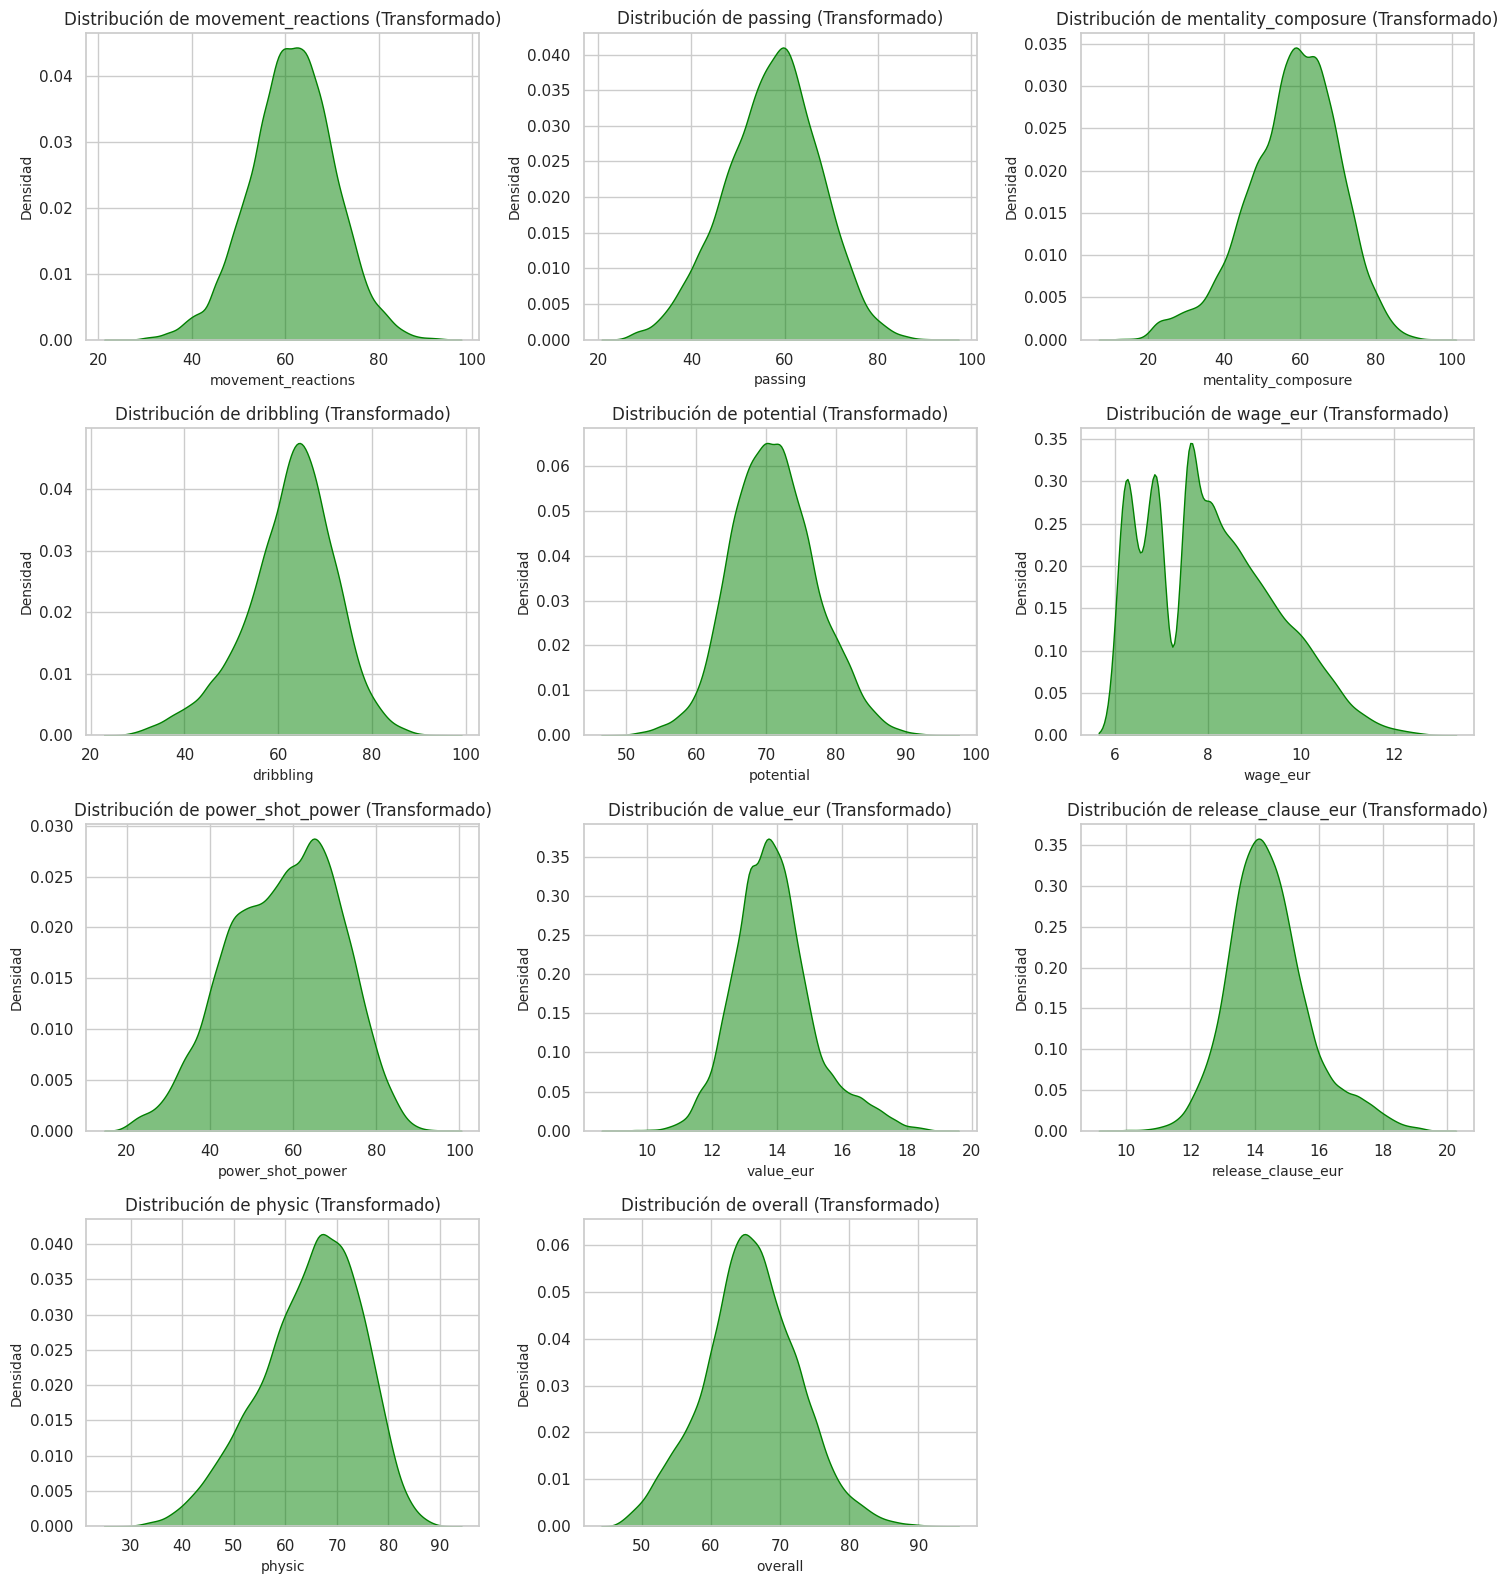

In [17]:
# Restaurar df_log_transformed desde el backup
df_log_transformed = df_log_transformed_backup.copy()

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Función para graficar densidad en formato de cuadrícula
def graficar_densidad_cuadricula(df, variables, columnas=3):
    filas = math.ceil(len(variables) / columnas)  # Calcular el número de filas
    plt.figure(figsize=(columnas * 5, filas * 4))  # Ajustar tamaño del grid

    for i, var in enumerate(variables, 1):
        if var in df.columns:
            plt.subplot(filas, columnas, i)  # Crear subgráfica
            sns.kdeplot(df[var], fill=True, alpha=0.5, color="green")
            plt.title(f"Distribución de {var} (Transformado)", fontsize=12)
            plt.xlabel(var, fontsize=10)
            plt.ylabel("Densidad", fontsize=10)
            plt.grid(True)

    plt.tight_layout()  # Ajustar espacio entre gráficos
    plt.show()

# Lista de variables del DataFrame logarítmicamente transformado para graficar
variables_para_graficar = variables_mas_correlacionadas  # Usar las variables más correlacionadas

# Generar gráficos de densidad en formato de cuadrícula
graficar_densidad_cuadricula(df_log_transformed, variables_para_graficar, columnas=3)



### Conclusiones de las distribuciones (variables transformadas)

- Las variables técnicas no han sufrido tranformaciones, por lo que no requieren ningún comentario adicional.
- Las variables económicas (`wage_eur`, `value_eur`, `release_clause_eur`) aún presentan distribuciones un tanto asimétricas, aún después de la transformación logarítmica, especialmente `wage_eur`, que aún muestra agrupamientos significativos. Por el momento continuaremos el análisis con estas variables y en el futuro evaluaremos si realmente vale la pena mantenerla entre las variables predictoras.

**A countinuación realizaremos en análisis univariado de histogramas para ambos datasets por separado**

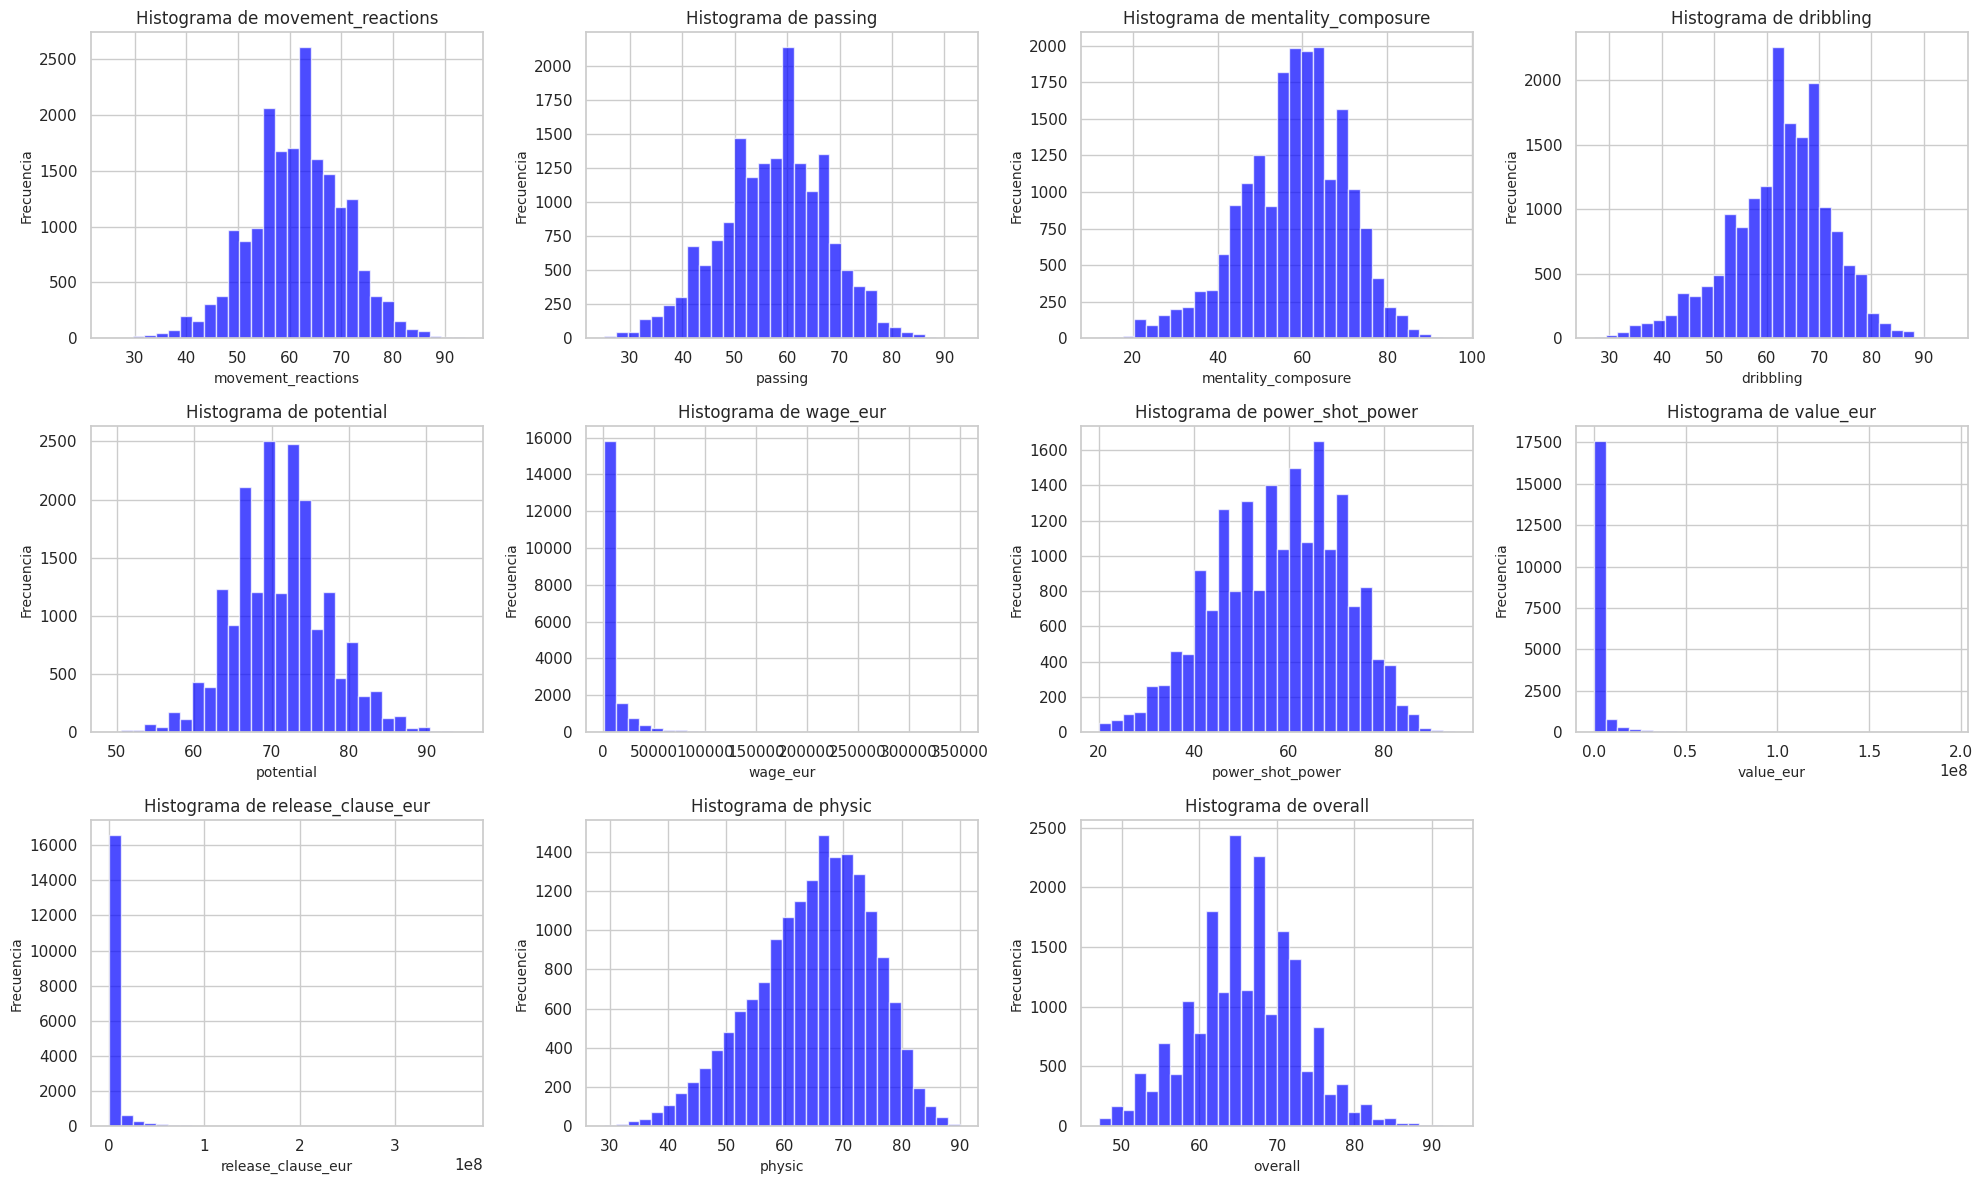

In [18]:
# Función para graficar histogramas en formato de cuadrícula
def graficar_histogramas_cuadricula(df, columnas=4):
    variables = df.columns  # Variables a graficar
    filas = math.ceil(len(variables) / columnas)  # Calcular el número de filas
    plt.figure(figsize=(columnas * 5, filas * 4))  # Ajustar tamaño del grid

    for i, var in enumerate(variables, 1):
        plt.subplot(filas, columnas, i)  # Crear subgráfica
        plt.hist(df[var], bins=30, color="blue", alpha=0.7)  # Histograma
        plt.title(f"Histograma de {var}", fontsize=12)
        plt.xlabel(var, fontsize=10)
        plt.ylabel("Frecuencia", fontsize=10)
        plt.grid(True)

    plt.tight_layout()  # Ajustar espacio entre gráficos
    plt.show()

# Generar histogramas para las variables de df_original
graficar_histogramas_cuadricula(df_original, columnas=4)




**Conclusiones de los histogramas de frecuencia:**

- **Habilidades técnicas y físicas**:
  - Variables como `movement_reactions`, `passing`, `mentality_composure`, `dribbling`, `potential`, `power_shot_power` y `physic` muestran distribuciones aproximadamente normales. Esto indica que la mayoría de los jugadores se concentran en rangos medios.

- **Variables económicas**:
  - `wage_eur`, `value_eur` y `release_clause_eur` tienen distribuciones altamente sesgadas hacia valores bajos, reflejando una marcada desigualdad en salarios y valores de mercado.

- **Impacto potencial**:
  - Las habilidades están distribuidas de manera uniforme, pero las disparidades en las variables económicas podrían influir significativamente en los modelos predictivos relacionados con el rendimiento o el valor de los jugadores.


**Conclusiones de los Histogramas**:
   - Las variables técnicas están bien distribuidas en general y podrían usarse directamente en nuestro modelo predictivo.
   - Tal como se dijo ateriormente, las variables económicas en cambio, pueden requerir transformaciones o un tratamiento adicional para reducir la influencia de los outliers.

Ahora analizaremos el resultado de los histogramas de **df_log_transformed** con las variables económicas transformadas logarítmicamente

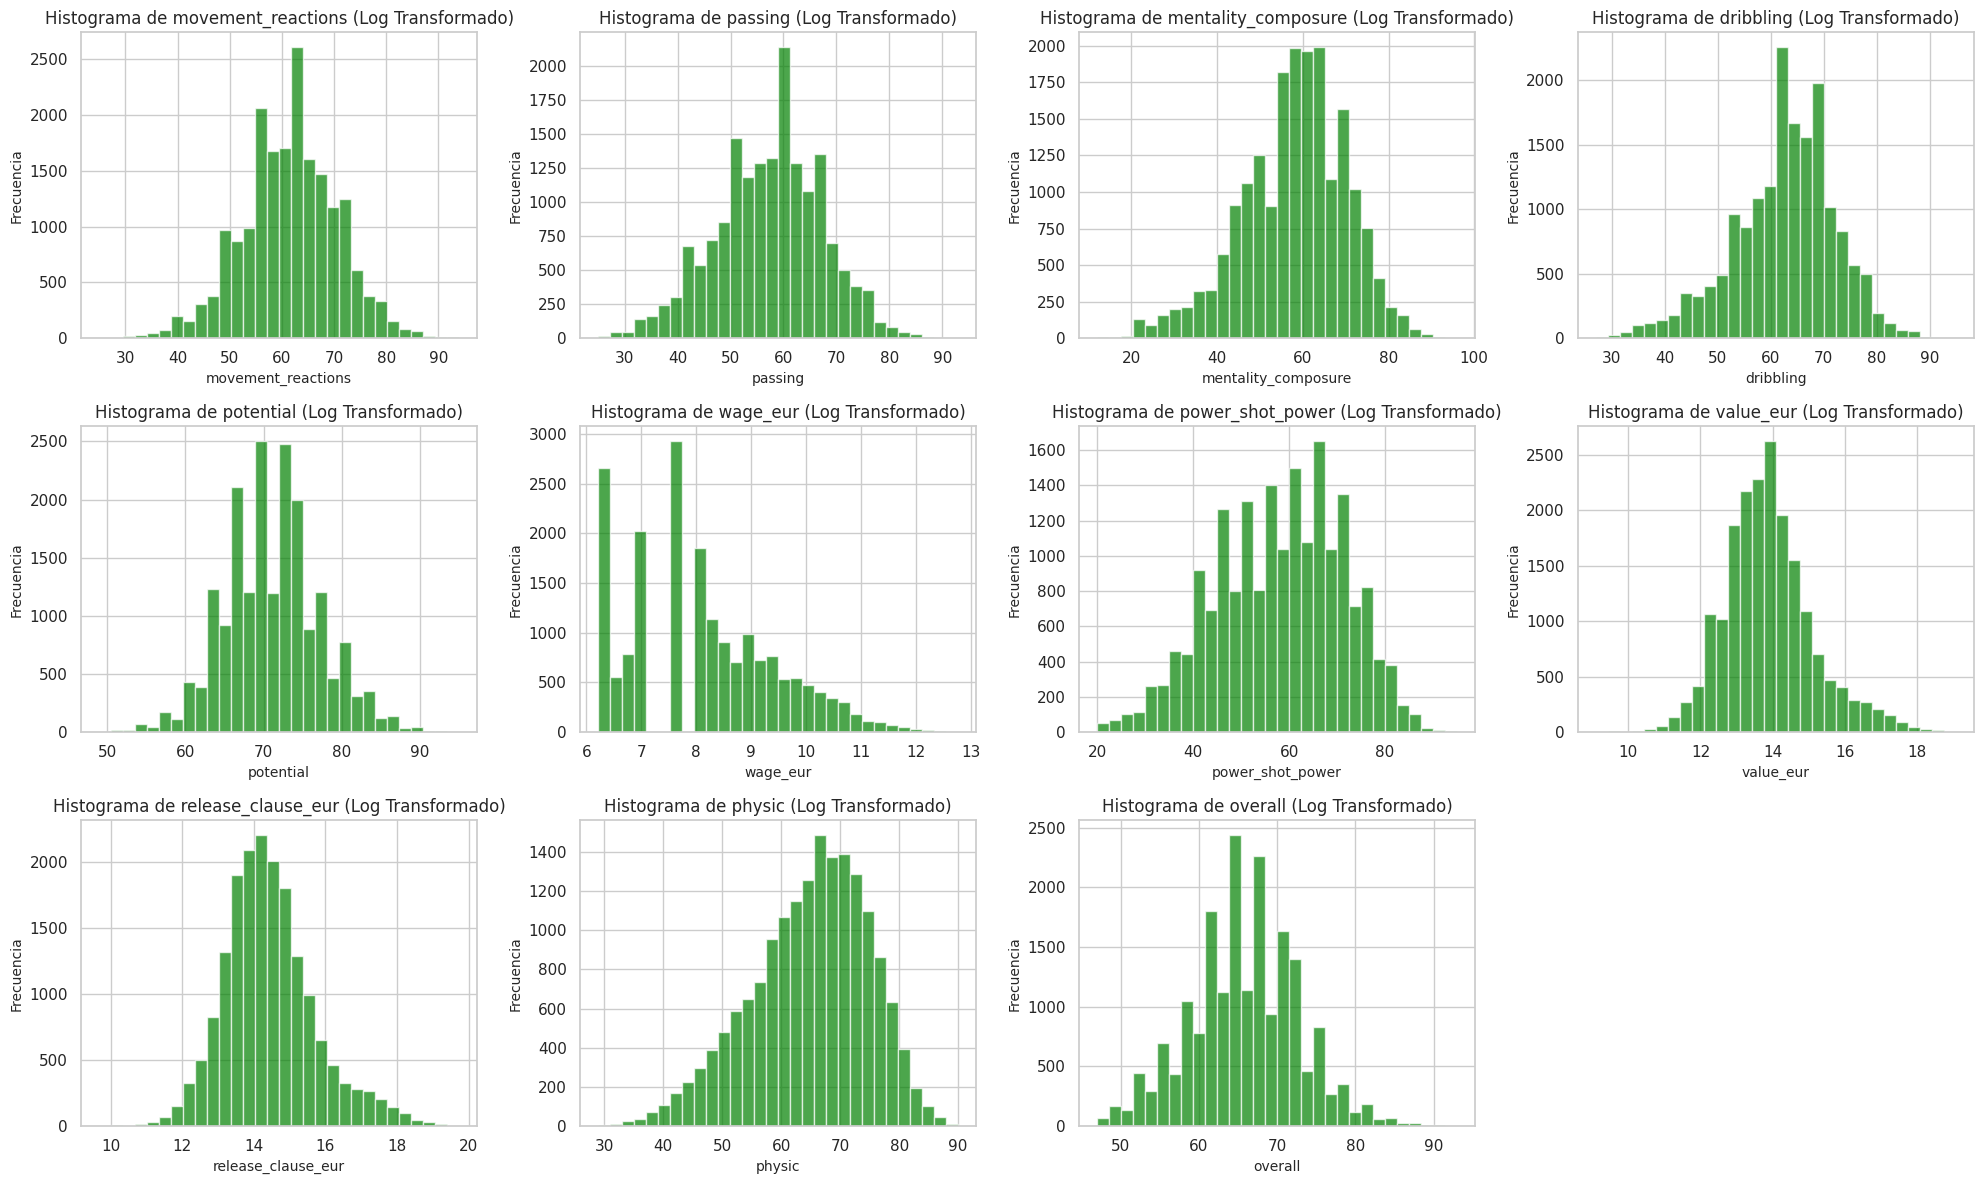

In [19]:
# Función para graficar histogramas en formato de cuadrícula
def graficar_histogramas_cuadricula(df, columnas=4):
    variables = df.columns  # Variables a graficar
    filas = math.ceil(len(variables) / columnas)  # Calcular el número de filas
    plt.figure(figsize=(columnas * 5, filas * 4))  # Ajustar tamaño del grid

    for i, var in enumerate(variables, 1):
        plt.subplot(filas, columnas, i)  # Crear subgráfica
        plt.hist(df[var], bins=30, color="green", alpha=0.7)  # Histograma en color verde
        plt.title(f"Histograma de {var} (Log Transformado)", fontsize=12)
        plt.xlabel(var, fontsize=10)
        plt.ylabel("Frecuencia", fontsize=10)
        plt.grid(True)

    plt.tight_layout()  # Ajustar espacio entre gráficos
    plt.show()

# Generar histogramas para las variables de df_log_transformed
graficar_histogramas_cuadricula(df_log_transformed, columnas=4)



**Conclusiones de los histogramas log-transformados:**

- **Habilidades técnicas y físicas**:
  - Variables como `movement_reactions`, `passing`, `mentality_composure`, `dribbling`, `potential`, y `power_shot_power` mantienen una distribución aproximadamente normal, lo que indica que los valores se concentran en rangos medios.

- **Variables económicas**:
  - Las transformaciones logarítmicas en `wage_eur`, `value_eur` y `release_clause_eur` han reducido significativamente el sesgo hacia los valores extremos. Ahora presentan distribuciones más uniformes y manejables para el modelo predictivo.


###**Análisis bivariado**

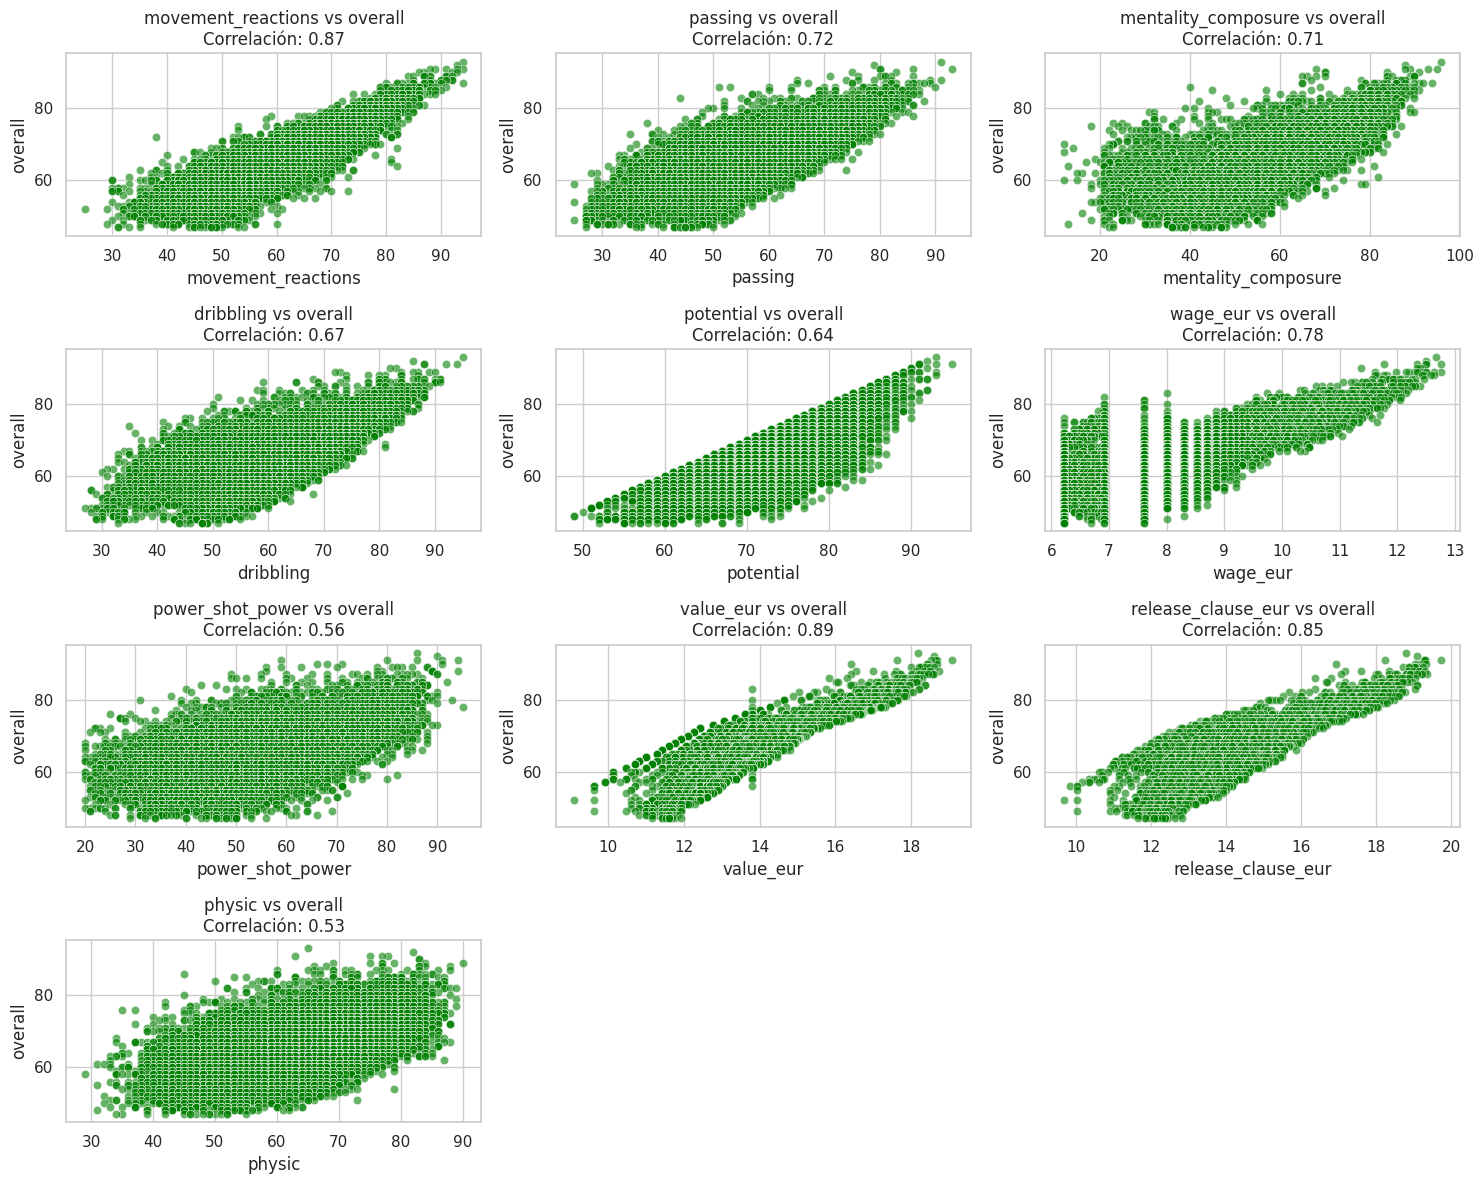

In [20]:
# Crear scatter plots y calcular coeficiente de correlación para cada variable
plt.figure(figsize=(15, 12))

for i, variable in enumerate(df_log_transformed.columns):
    if variable != 'overall':  # Excluir 'overall' para evitar autocomparación
        # Filtrar filas donde ambas columnas no tengan valores nulos
        data_no_nulos = df_log_transformed[[variable, 'overall']].dropna()

        # Crear scatter plot
        plt.subplot(4, 3, i + 1)  # Crear una cuadrícula de subgráficos
        sns.scatterplot(data=data_no_nulos, x=variable, y='overall', alpha=0.6, color='green')

        # Calcular el coeficiente de correlación de Pearson
        correlacion, _ = pearsonr(data_no_nulos[variable], data_no_nulos['overall'])

        # Agregar título con la correlación
        plt.title(f"{variable} vs overall\nCorrelación: {correlacion:.2f}")
        plt.xlabel(variable)
        plt.ylabel("overall")

plt.tight_layout()
plt.show()


### Conclusiones de los Scatterplots

1. **Variables con alta correlación con `overall`**:
   - `value_eur` y `release_clause_eur` tienen las correlaciones más altas (0.89 y 0.85, respectivamente), indicando que el valor de mercado y la cláusula de rescisión son buenos predictores del rendimiento global (`overall`).
   - `movement_reactions` también tiene una correlación fuerte (0.87), lo que destaca la importancia de las reacciones en el desempeño general.

2. **Variables con correlación moderada**:
   - `wage_eur` (0.78) y `dribbling` (0.67) muestran relaciones moderadas con `overall`, sugiriendo que aunque importantes, no son tan determinantes como otras variables.
   - `passing` y `mentality_composure` tienen correlaciones similares (0.72 y 0.71), lo que resalta su relevancia para el rendimiento.

3. **Variables con menor correlación**:
   - `physic` (0.53) y `power_shot_power` (0.56) tienen las correlaciones más bajas con `overall`, aunque siguen mostrando una relación positiva.

4. **Patrones generales**:
   - Todas las variables muestran una relación positiva con `overall`, aunque con distintas intensidades.
   - Las transformaciones logarítmicas han ayudado a suavizar las distribuciones de las variables económicas, haciendo más claras las relaciones lineales en los gráficos.

**Conclusión general**:
Variables técnicas como `movement_reactions`, `passing` y `dribbling` tienen un impacto notable en el rendimiento general (`overall`). Sin embargo, las variables económicas (`value_eur`, `release_clause_eur`) presentan las correlaciones más altas, destacando su utilidad para modelos predictivos centrados en evaluar el desempeño de los jugadores.



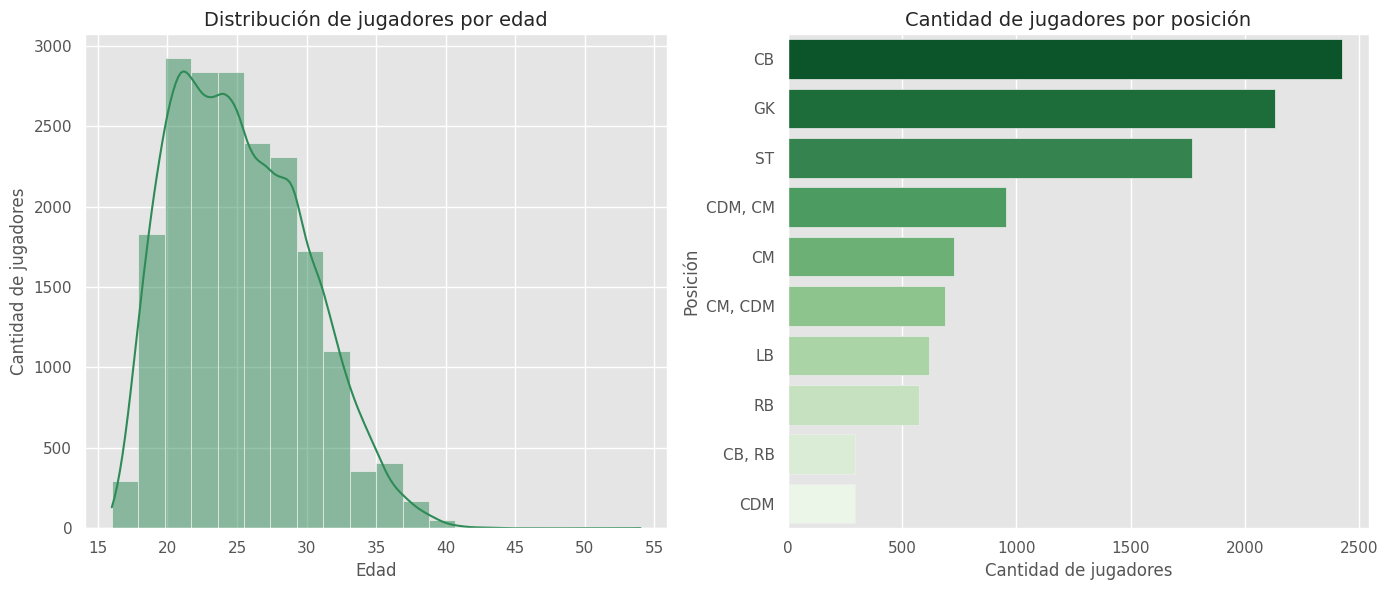

In [24]:
import warnings
warnings.filterwarnings("ignore")  # Oculta las advertencias

# Configurar el estilo de los gráficos
plt.style.use("ggplot")

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribución de edades
sns.histplot(df["age"], bins=20, kde=True, ax=axes[0], color="seagreen")
axes[0].set_title("Distribución de jugadores por edad", fontsize=14)
axes[0].set_xlabel("Edad", fontsize=12)
axes[0].set_ylabel("Cantidad de jugadores", fontsize=12)

# Jugadores por posición
top_positions = df["player_positions"].value_counts().head(10)  # Top 10 posiciones más comunes
sns.barplot(x=top_positions.values, y=top_positions.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Cantidad de jugadores por posición", fontsize=14)
axes[1].set_xlabel("Cantidad de jugadores", fontsize=12)
axes[1].set_ylabel("Posición", fontsize=12)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()




**Distribución de jugadores por edad**  
- La mayoría de los jugadores están en el rango de **20 a 30 años**, con un pico alrededor de los **25 años**.  
- Hay muy pocos jugadores menores de **18 años** y mayores de **40 años**, lo que refleja la duración típica de una carrera profesional.  
- La distribución es **asimétrica a la derecha**, lo que indica una disminución progresiva en la cantidad de jugadores a medida que envejecen.  

**Distribución de jugadores por posición**  
- Las posiciones más frecuentes son **CB (Defensa Central), GK (Arquero) y ST (Delantero Central)**.  
- Se observa la presencia de **posiciones combinadas**, como **"CM, CDM"**, lo que sugiere la versatilidad de algunos jugadores.  
- Posiciones como **RB (Lateral Derecho) y LB (Lateral Izquierdo)** tienen una menor representación en comparación con los defensores centrales y porteros.  

**Conclusión General**  
**Los jugadores tienen su edad óptima de rendimiento entre los 20 y 30 años.**  
**Las posiciones más comunes reflejan la importancia táctica de defensores centrales, arqueros y delanteros en los equipos.**  
**La existencia de jugadores con múltiples posiciones muestra la importancia de la versatilidad en el fútbol.**  



###**Análisis multivariado**

Aquí es donde se realiza el análisis que se ha venido usando hasta ahora, con las 10 variables numéricas mas correlacionadas con **Overall** que ha generado los dos datasets que usamos anteriormente. Al llegar a este punto se observó el comportamiento de estas variables y se decidió volver a hacer los analisis univariados y multivariados en base a los resultados de este paso. Este proceso es algo iterativo que ha ido generando multiples versiones a medida que se han estudidado las variables de distintas formas.

In [ ]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlaciones = df_numerico.corr()

# Seleccionar las correlaciones con la variable 'overall' y ordenarlas
correlacion_overall = correlaciones['overall'].sort_values(ascending=False)

# Seleccionar las 10 variables con mayor correlación (excluyendo 'overall' misma)
top_10_correlaciones = correlacion_overall.drop('overall').head(10)

# Mostrar el resultado
print("Las 10 variables numéricas con mayor correlación con 'overall' son:")
print(top_10_correlaciones)


Las 10 variables numéricas con mayor correlación con 'overall' son:
movement_reactions     0.871823
passing                0.715001
mentality_composure    0.708867
dribbling              0.666402
potential              0.644275
wage_eur               0.600375
power_shot_power       0.561180
value_eur              0.553330
release_clause_eur     0.545197
physic                 0.529234
Name: overall, dtype: float64


Aquí se pueden observar claramente cuales son las 10 variables que tienen mayor correlación con 'Overall', a este conjunto lo llamaremos **top_10_correlaciones**

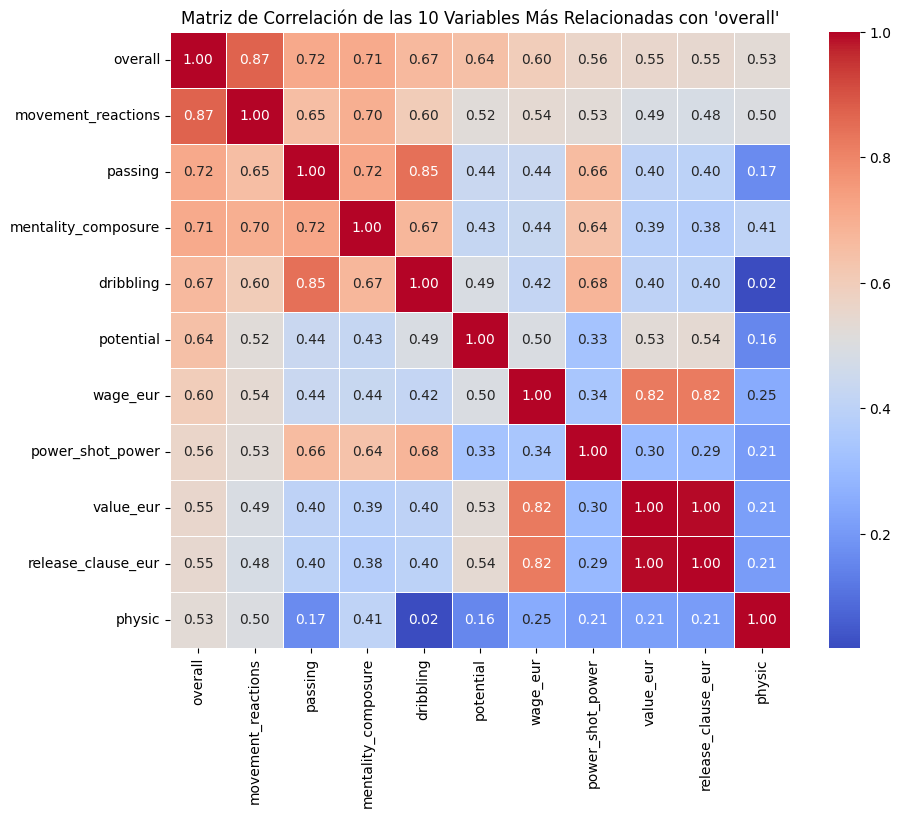

In [ ]:
# Crear una matriz de correlación para estas variables y 'overall'
variables_interes = ['overall'] + list(top_10_correlaciones.index)
matriz_correlacion = df_numerico[variables_interes].corr()

# Crear un gráfico de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de las 10 Variables Más Relacionadas con 'overall'")
plt.show()



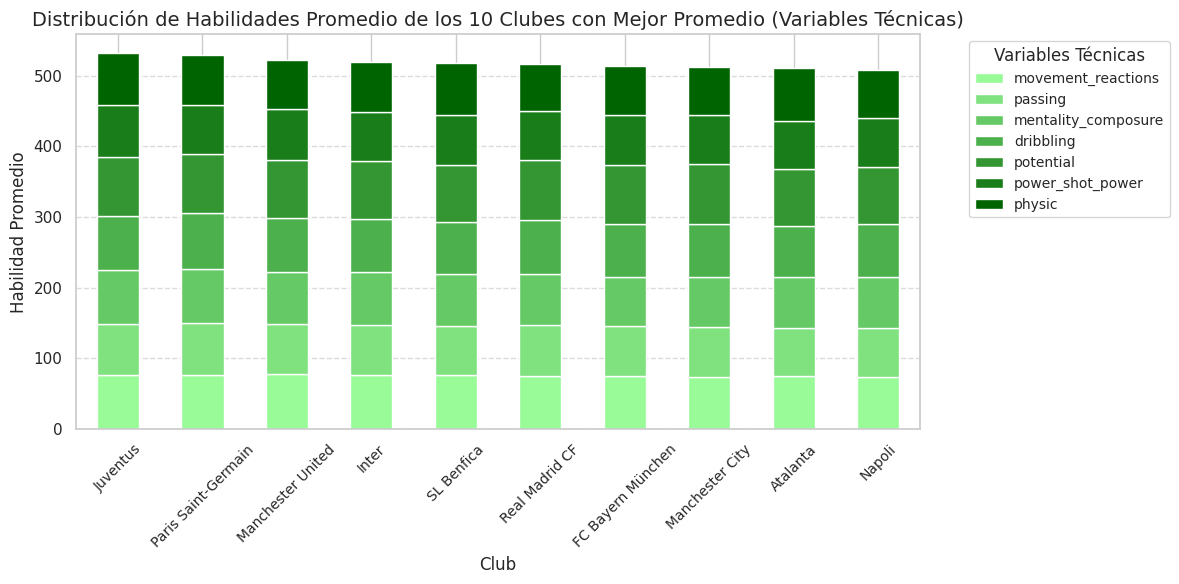

In [ ]:
# Suponiendo que 'df' es tu DataFrame y ya ha sido cargado

# Lista de variables técnicas (excluyendo las económicas)
variables_tecnicas = [
    'movement_reactions', 'passing', 'mentality_composure',
    'dribbling', 'potential', 'power_shot_power', 'physic'
]

# Calcular el promedio de las variables técnicas por club
avg_skills_by_club = df.groupby('club_name')[variables_tecnicas].mean()

# Seleccionar los 10 clubes con mayor promedio en las variables técnicas
top_clubs = avg_skills_by_club.mean(axis=1).nlargest(10).index
top_avg_skills_by_club = avg_skills_by_club.loc[top_clubs]

# Crear un colormap del verde claro al verde oscuro
verde_colormap = LinearSegmentedColormap.from_list(
    'VerdeGradiente', ['#98FB98', '#006400'], N=len(variables_tecnicas)
)

# Crear gráfico de barras apiladas para los 10 clubes seleccionados
ax = top_avg_skills_by_club.plot(kind='bar', stacked=True, figsize=(12, 6), colormap=verde_colormap)
plt.title('Distribución de Habilidades Promedio de los 10 Clubes con Mejor Promedio (Variables Técnicas)', fontsize=14)
plt.ylabel('Habilidad Promedio', fontsize=12)
plt.xlabel('Club', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Variables Técnicas', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





### Conclusiones del Gráfico

1. Juventus, Paris Saint-Germain, y Manchester United destacan por sus habilidades técnicas promedio más altas.
2. Las habilidades están distribuidas de forma equilibrada entre los clubes, con `potential` y `physic` siendo contribuyentes clave.
3. Los clubes seleccionados reflejan un alto nivel técnico competitivo.


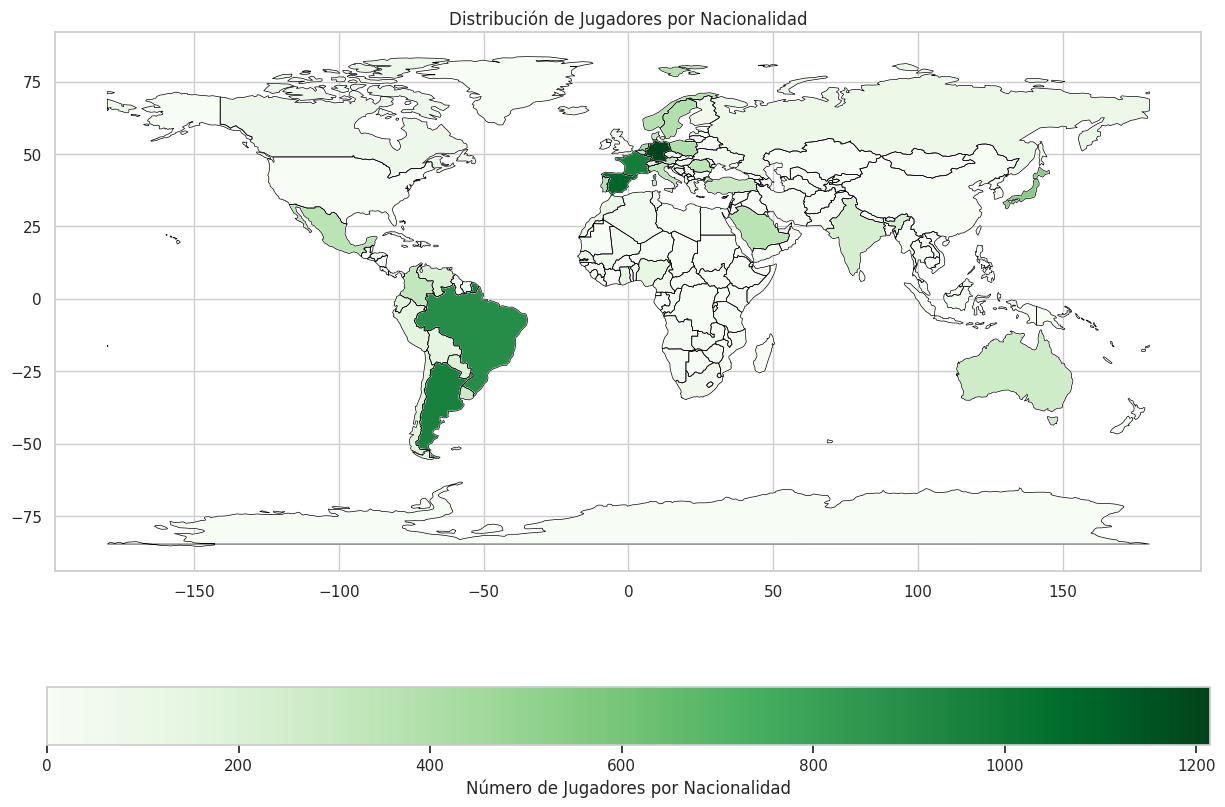

In [ ]:
 # Contar el número de jugadores por nacionalidad en el dataset
nationality_count = df['nationality_name'].value_counts().reset_index()
nationality_count.columns = ['name', 'Player Count']  # Renombrar columnas para hacer el merge

# Merge con los datos de nacionalidad
world = world.merge(nationality_count, on='name', how='left').fillna(0)

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, color="black", linewidth=0.5)
world.plot(column='Player Count', ax=ax, legend=True, cmap='Greens',
           legend_kwds={'label': "Número de Jugadores por Nacionalidad", 'orientation': "horizontal"})
plt.title('Distribución de Jugadores por Nacionalidad')
plt.show()



### Conclusiones del Mapa de Concentración de Jugadores por Nacionalidad

1. **Concentración en Europa**: Se observa una alta densidad de jugadores provenientes de países europeos, especialmente de naciones como Alemania, España, Francia e Italia, lo cual refleja la importancia de Europa en el fútbol profesional, según este dataset.

2. **Brasil y Argentina como Potencias**: Brasil y Argentina destacan como los países con mayor número de jugadores en América del Sur, reafirmando su rol como exportadores clave de talento futbolístico.

3. **Distribución Moderada en Otras Regiones**: Existen contribuciones moderadas desde países de África, Asia y América del Norte, aunque significativamente menores en comparación con Europa y Sudamérica.

4. **Baja Representación en Oceanía**: Los países de Oceanía, como Nueva Zelanda y Australia, muestran una menor cantidad de jugadores en comparación con otras regiones del mundo.

5. **Dominancia de Países Históricos**: Las naciones con tradición futbolística sobresalen, lo que puede estar vinculado a la infraestructura deportiva y el desarrollo histórico del deporte en estas regiones.

Este mapa ilustra claramente cómo los contextos geográficos y culturales influyen en la distribución del talento futbolístico mundial.


**Conclusiones**

# Conclusiones del Análisis de Datos

##1. Factores Clave en el Rendimiento de los Jugadores
- Las **10 variables más correlacionadas con `overall`** nos permiten identificar qué características impactan más en la calificación general de un jugador.
- Las variables económicas (`wage_eur`, `value_eur`, `release_clause_eur`) están entre las más correlacionadas, lo que indica que los jugadores mejor valorados económicamente también tienden a tener un mejor rendimiento general.

##2. Impacto de las Variables Económicas
- Al aplicar la **transformación logarítmica (`log1p`)** a `wage_eur`, `value_eur` y `release_clause_eur`, hemos reducido el efecto de valores extremos (outliers), mejorando la estabilidad de los datos para el modelo de ML.
- Se observa que los salarios (`wage_eur`) presentan una **distribución altamente sesgada**, con una mayoría de jugadores ganando relativamente poco en comparación con unos pocos que tienen salarios extremadamente altos.
- La categorización de `wage_eur_category` nos permite segmentar mejor los jugadores en rangos salariales, facilitando la interpretación de patrones.

##3. Relaciones Clave y Patrones Observados
- Existe una **relación no lineal** entre las variables económicas y `overall`, lo que sugiere que el aumento en el valor de mercado no siempre implica un crecimiento proporcional en la calificación general del jugador.
- Algunas variables técnicas parecen ser más relevantes para ciertas posiciones, pero aún falta un análisis más detallado de la influencia de estas en distintas posiciones de juego.

##4. Siguientes Pasos a Evaluar
1. **Profundizar en el análisis de las posiciones** para ver si la correlación de ciertas variables varía en función de la posición de los jugadores.
2. **Evaluar el impacto de la edad** en el rendimiento de los jugadores y si influye en la relación entre salario y calificación.
3. **Probar diferentes modelos de Machine Learning**, optimizando la selección de variables y ajustando hiperparámetros para mejorar la predicción del `overall`.

# **Preprocesamiento de datos**

**Codificación de variables categóricas**

#**Feature Selection**

**Selección de variable objetivo y variables independientes**

# **Modelos**

**Librerias necesarias para implementar los modelos**

**División de datos en conjuntos de entrenamiento y prueba**

**Predicción con conjunto de prueba**

**Evaluación del rendimiento del modelo**

**Conclusión sobre el modelado y las metricas**

#**Optimización de modelos**

**Conclusión sobre la optimización**

# **Conclusiones Finales**